In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import mglearn
%matplotlib inline

### Dimensionality Reduction,feature extraction and manifold learning

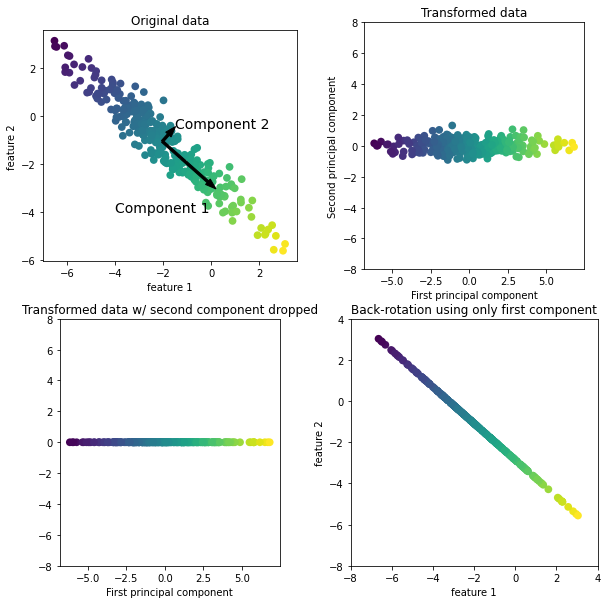

In [2]:
# Pricipal Component Analysis (PCA)
mglearn.plots.plot_pca_illustration()

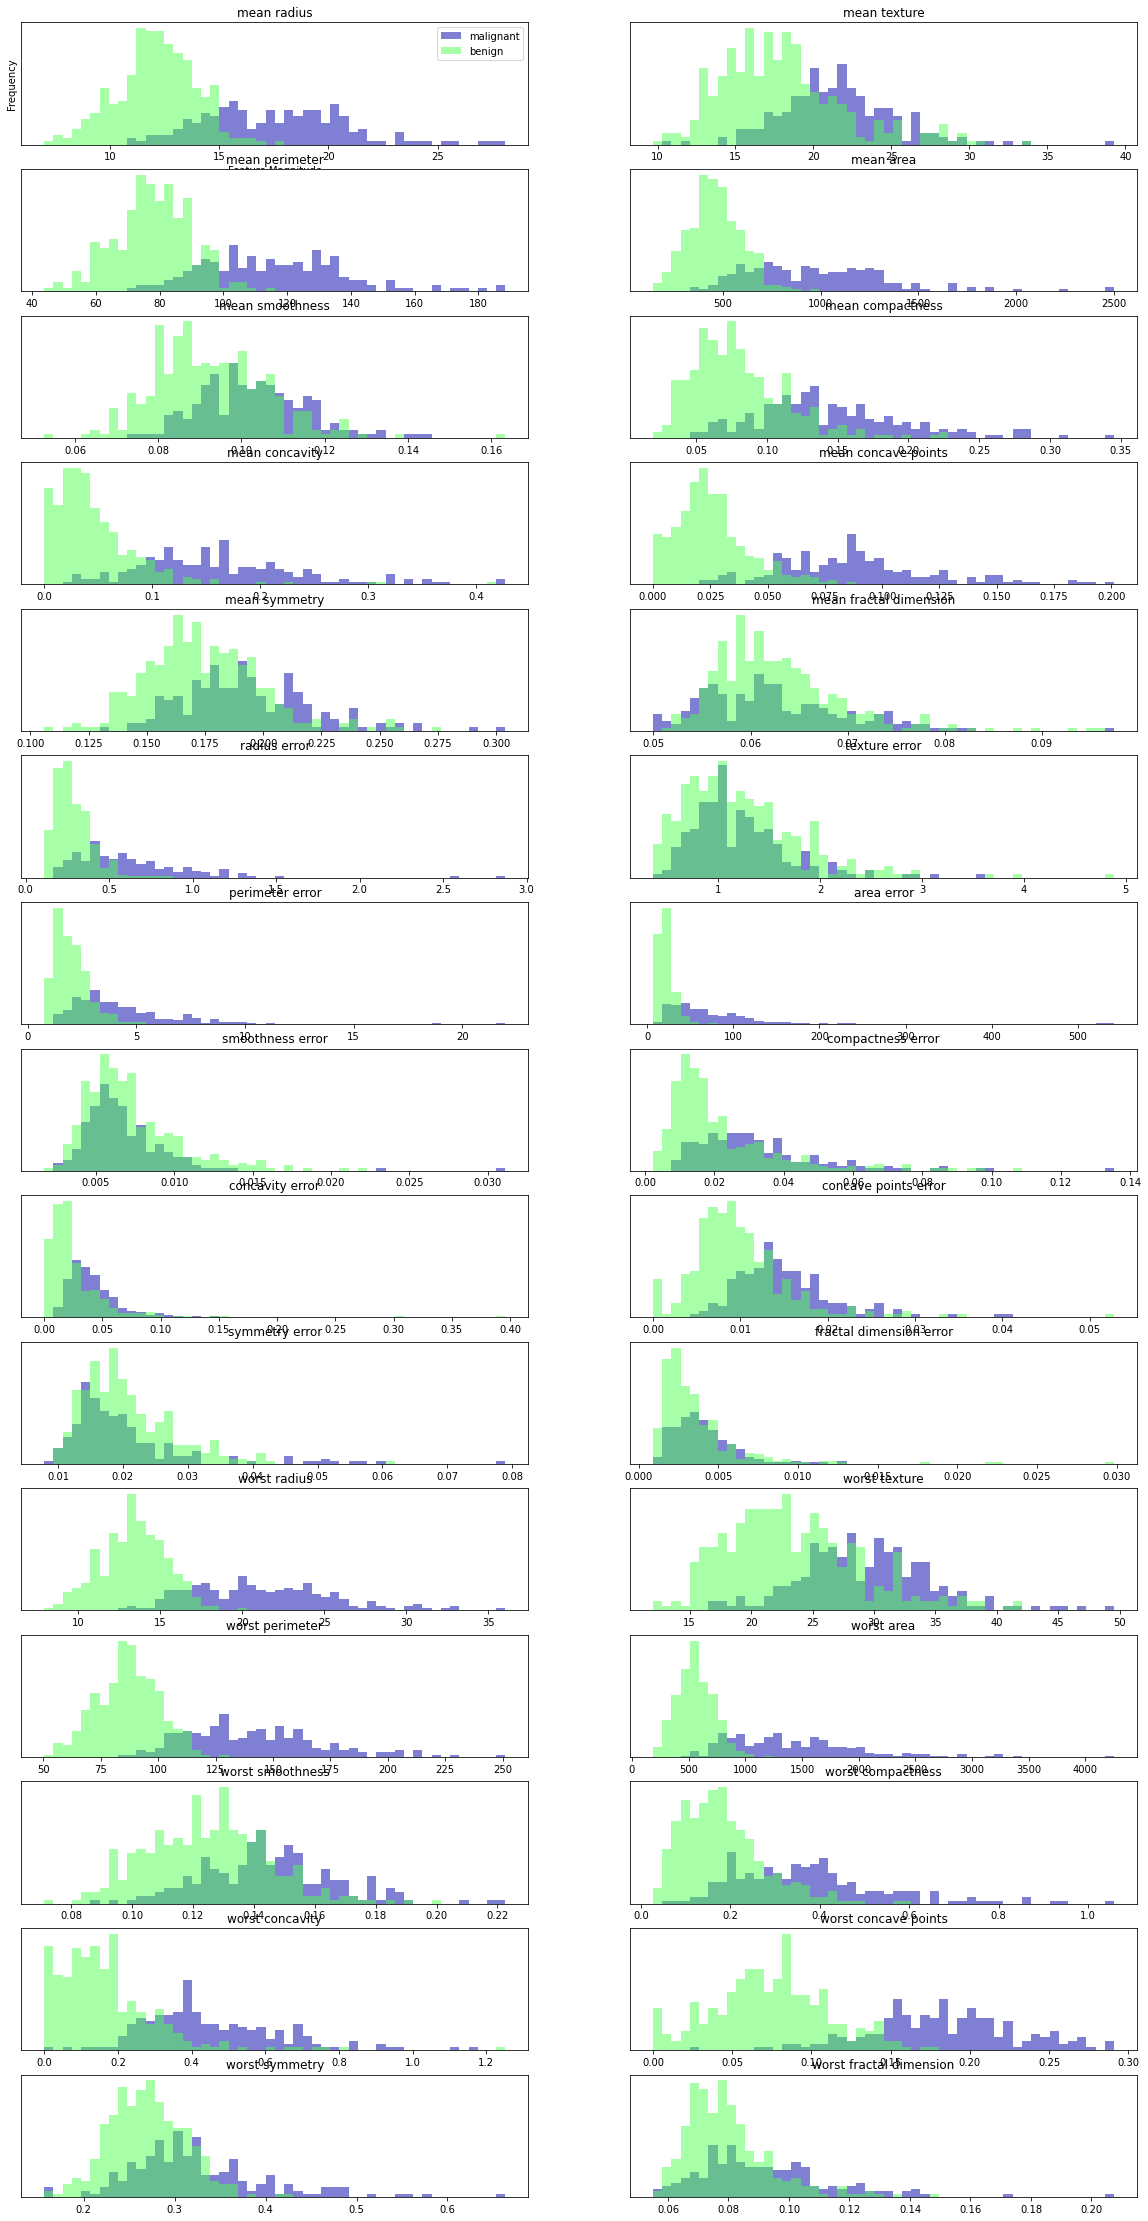

In [3]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()

fig,axes=plt.subplots(15,2,figsize=(20,40))
malignant=cancer.data[cancer.target==0]
benign=cancer.data[cancer.target==1]

ax=axes.ravel()

for i in range(30):
    _,bins=np.histogram(cancer.data[:,i],bins=50)
    ax[i].hist(malignant[:,i],bins=bins,color=mglearn.cm3(0),alpha=0.5)
    ax[i].hist(benign[:,i],bins=bins,color=mglearn.cm3(2),alpha=0.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())

ax[0].set_xlabel("Feature Magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant","benign"],loc="best")


In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
cancer=load_breast_cancer()
scaler=StandardScaler()

X_scaled=scaler.fit_transform(cancer.data)

In [5]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pca.fit(X_scaled)
X_pca=pca.transform(X_scaled)
print("Original shape:{}".format(X_scaled.shape))
print("Transformed shape:{}".format(X_pca.shape))

Original shape:(569, 30)
Transformed shape:(569, 2)


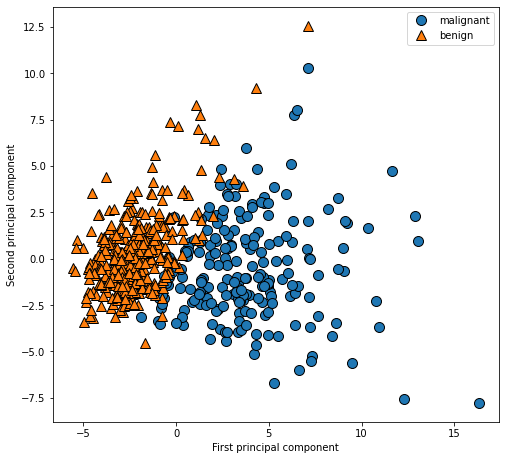

In [6]:
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0],X_pca[:,1],cancer.target)
plt.legend(cancer.target_names,loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.show()

In [7]:
print("PCA component shape: {}".format(pca.components_.shape))

PCA component shape: (2, 30)


In [8]:
print("PCA components:\n{}".format(pca.components_))

PCA components:
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, 'Principal components')

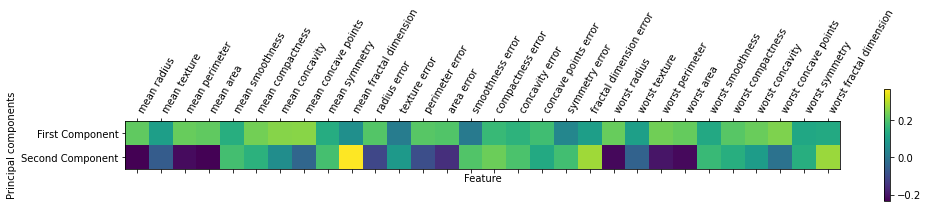

In [9]:
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1],["First Component","Second Component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),cancer.feature_names,rotation=60,ha="left")
plt.xlabel("Feature")
plt.ylabel("Principal components")

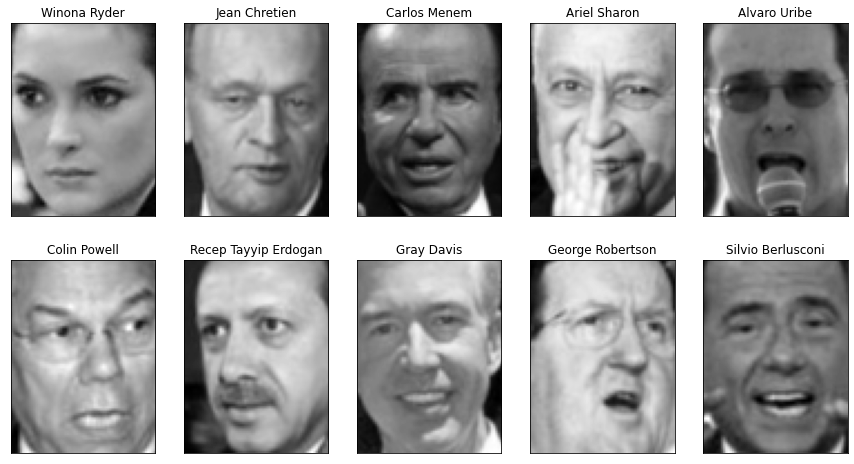

In [10]:
#Eigenfaces for feature extraction
from sklearn.datasets import fetch_lfw_people
people=fetch_lfw_people(min_faces_per_person=20,resize=0.7)
image_shape=people.images[0].shape

fig,axes=plt.subplots(2,5,figsize=(15,8),subplot_kw={'xticks':(),'yticks':()})

for target,image,ax in zip(people.target, people.images,axes.ravel()):
    ax.imshow(image,cmap='gray')
    ax.set_title(people.target_names[target])

In [11]:
print("people.images.shape: {}".format(people.images.shape))
print("Number of classes:{}".format(len(people.target_names)))

people.images.shape: (3023, 87, 65)
Number of classes:62


In [12]:
# count how often each target appears
counts=np.bincount(people.target)
# print counts next to target names
for i,(count,name) in enumerate(zip(counts,people.target_names)):
    print("{0:25} {1:3}".format(name,count),end=' ')
    if (i+1)%3==0:
        print()

Alejandro Toledo           39 Alvaro Uribe               35 Amelie Mauresmo            21 
Andre Agassi               36 Angelina Jolie             20 Ariel Sharon               77 
Arnold Schwarzenegger      42 Atal Bihari Vajpayee       24 Bill Clinton               29 
Carlos Menem               21 Colin Powell              236 David Beckham              31 
Donald Rumsfeld           121 George Robertson           22 George W Bush             530 
Gerhard Schroeder         109 Gloria Macapagal Arroyo    44 Gray Davis                 26 
Guillermo Coria            30 Hamid Karzai               22 Hans Blix                  39 
Hugo Chavez                71 Igor Ivanov                20 Jack Straw                 28 
Jacques Chirac             52 Jean Chretien              55 Jennifer Aniston           21 
Jennifer Capriati          42 Jennifer Lopez             21 Jeremy Greenstock          24 
Jiang Zemin                20 John Ashcroft              53 John Negroponte            31 

In [13]:
mask=np.zeros(people.target.shape,dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target==target)[0][:50]] = 1

X_people=people.data[mask]
y_people=people.target[mask]


# scale the grayscale values to be between 0 and 1
# instead of 0 and 255 for better numeric stability
X_people=X_people/255

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_people,y_people,stratify=y_people,random_state=0)
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
print("test score:{}".format(knn.score(X_test,y_test)))

test score:0.23255813953488372


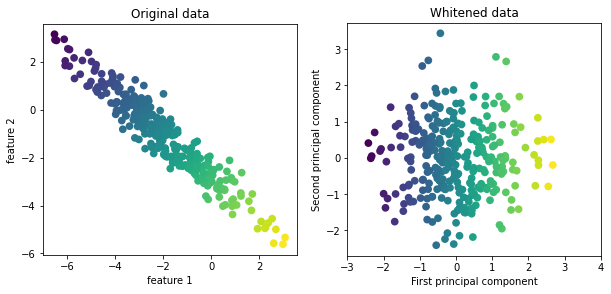

In [15]:
mglearn.plots.plot_pca_whitening()

In [16]:
pca=PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)

print("X_train_pca.shape:{}".format(X_train_pca.shape))

X_train_pca.shape:(1547, 100)


In [17]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca,y_train)
print("test score:{:.2f}".format(knn.score(X_test_pca,y_test)))

test score:0.31


In [18]:
print("pca.components_.shape: {}".format(pca.components_.shape))

pca.components_.shape: (100, 5655)


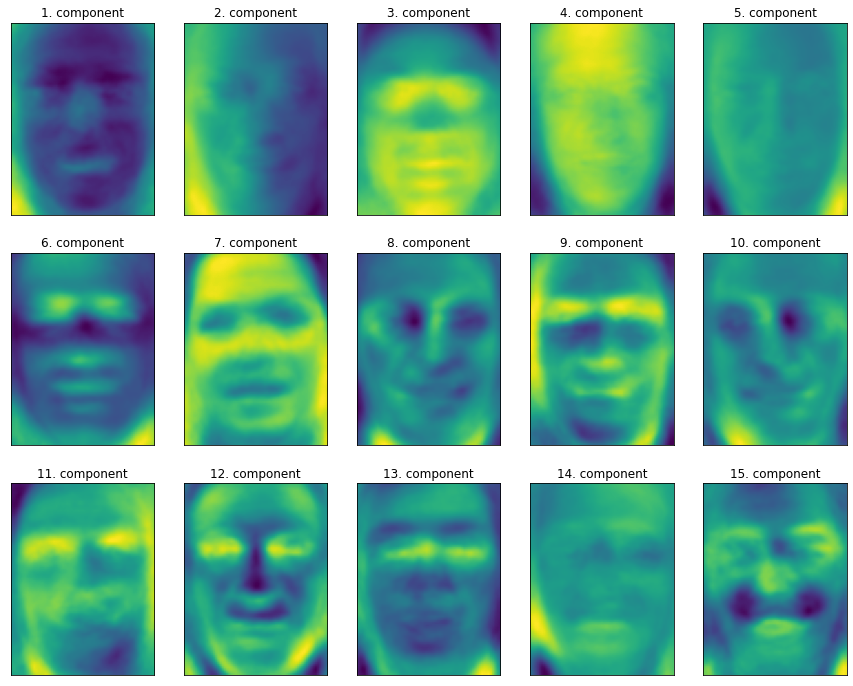

In [19]:
fig, axes=plt.subplots(3,5,figsize=(15,12),subplot_kw={'xticks':(),'yticks':()})

for i,(component,ax) in enumerate(zip(pca.components_,axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("{}. component".format((i+1)))

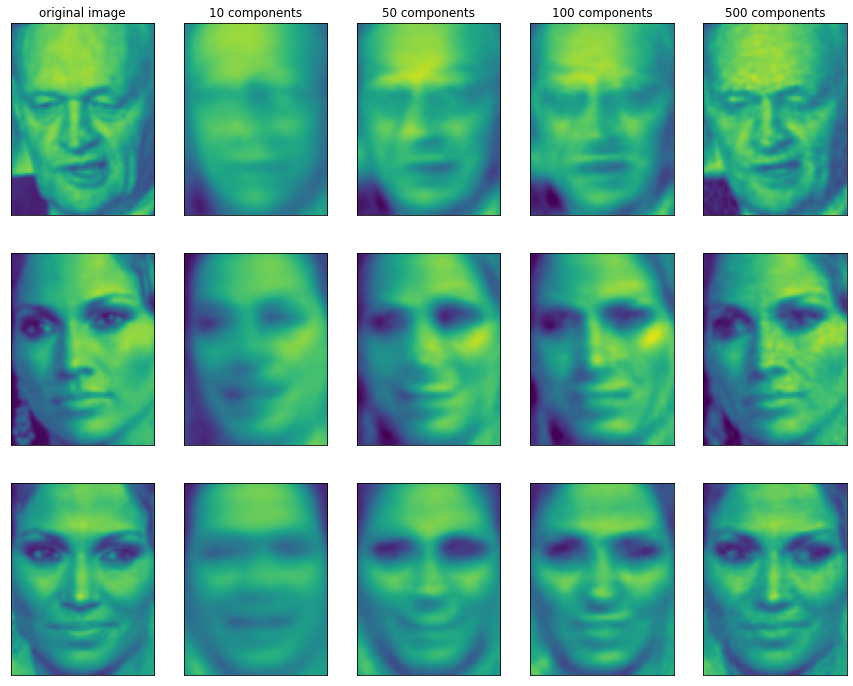

In [20]:
mglearn.plots.plot_pca_faces(X_train,X_test,image_shape)

Text(0, 0.5, 'Second prinicipal component')

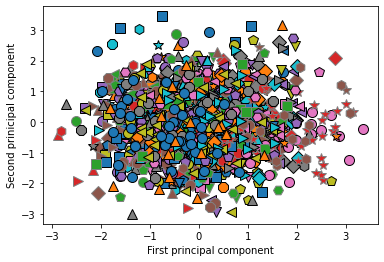

In [21]:
mglearn.discrete_scatter(X_train_pca[:,0],X_train_pca[:,1],y_train)
plt.xlabel("First principal component")
plt.ylabel("Second prinicipal component")

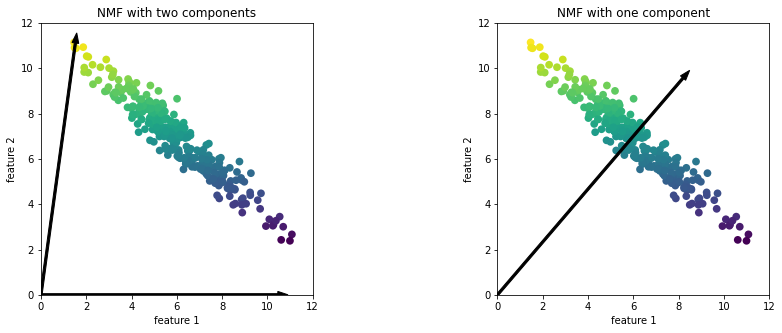

In [22]:
# Non-Negative Matrix Factorization (NMF)

mglearn.plots.plot_nmf_illustration()

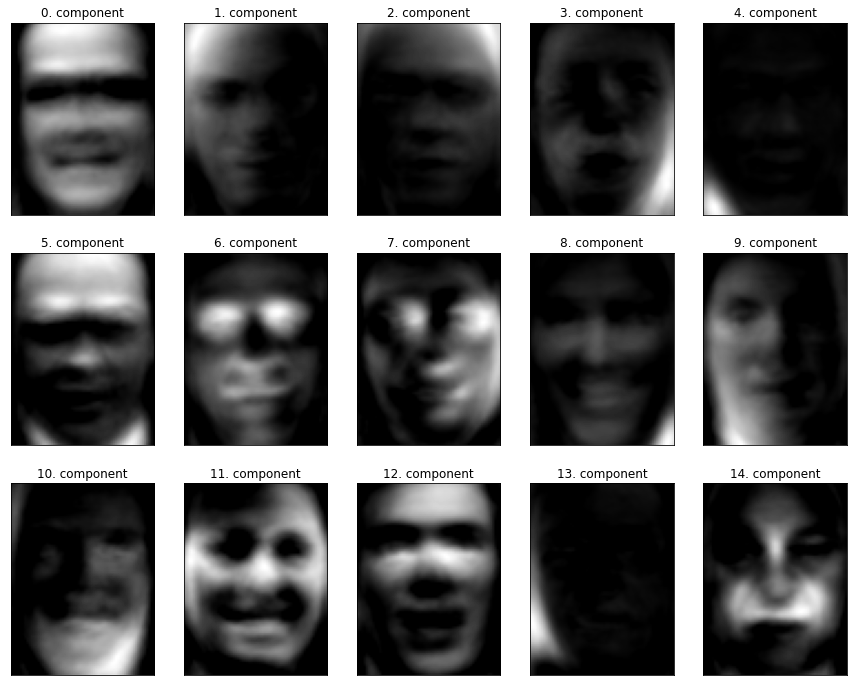

In [25]:
from sklearn.decomposition import NMF
nmf=NMF(n_components=15, random_state=0)
nmf.fit(X_train)
X_train_nmf=nmf.transform(X_train)
X_test_nmf=nmf.transform(X_test)


fig,axes=plt.subplots(3,5,figsize=(15,12),subplot_kw={'xticks':(),'yticks':()})

for i, (component,ax) in enumerate(zip(nmf.components_,axes.ravel())):
    ax.imshow(component.reshape(image_shape),cmap='gray')
    ax.set_title("{}. component".format(i))

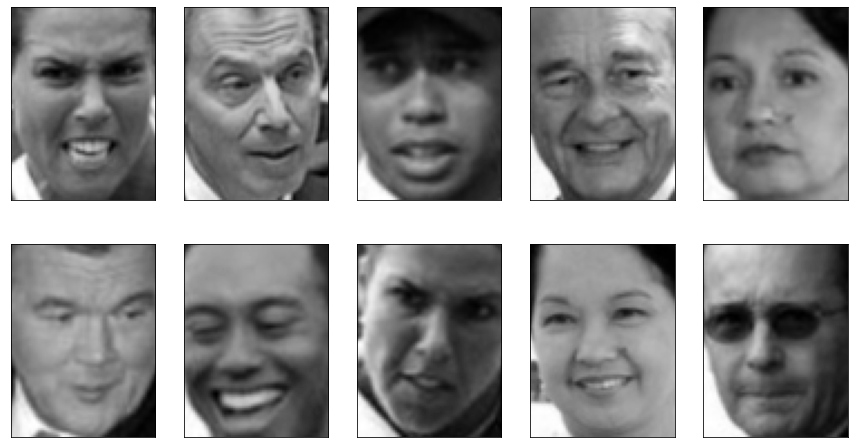

In [26]:
compn=4
# sort by 3rd component plot first 10 images
inds=np.argsort(X_train_nmf[:,compn])[::-1]
fig,axes=plt.subplots(2,5,figsize=(15,8),subplot_kw={'xticks':(),'yticks':()})

for i, (ind, ax) in enumerate(zip(inds,axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape),cmap='gray')

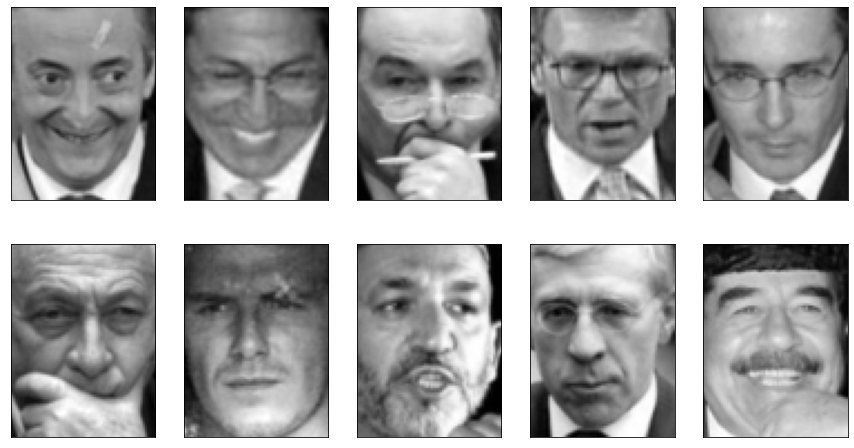

In [27]:
compn=10
# sort by 3rd component plot first 10 images
inds=np.argsort(X_train_nmf[:,compn])[::-1]
fig,axes=plt.subplots(2,5,figsize=(15,8),subplot_kw={'xticks':(),'yticks':()})

for i, (ind, ax) in enumerate(zip(inds,axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape),cmap='gray')

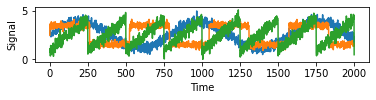

In [28]:
S=mglearn.datasets.make_signals()
plt.figure(figsize=(6,1))
plt.plot(S,'-')
plt.xlabel("Time")
plt.ylabel("Signal")
plt.show()

In [30]:
# mix data into a 100-dimensional state
A=np.random.RandomState(0).uniform(size=(100,3))
X=np.dot(S,A.T)
print("Shape of measurements: {}".format(X.shape))

Shape of measurements: (2000, 100)


In [31]:
nmf=NMF(n_components=3, random_state=42)
S_=nmf.fit_transform(X)
print("Recovered signal shale: {}".format(S_.shape))

Recovered signal shale: (2000, 3)


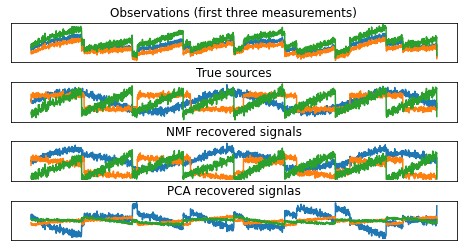

In [33]:
pca=PCA(n_components=3)
H=pca.fit_transform(X)

models=[X,S,S_,H]
names=['Observations (first three measurements)',
        'True sources',
        'NMF recovered signals',
        'PCA recovered signlas']
fig,axes= plt.subplots(4,figsize=(8,4),gridspec_kw={'hspace': .5},
                    subplot_kw={'xticks':(),'yticks':()})

for model, name, ax in zip(models,names,axes):
    ax.set_title(name)
    ax.plot(model[:,:3],'-')